<a href="https://colab.research.google.com/github/ashaduzzaman-sarker/Fashion-MNIST-dataset-Classification-with-CNN/blob/main/Fashion_MNIST_dataset_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST dataset : Classification with CNN
---




**Project Overview:**

This project aims to build a neural network model to classify clothing images from the Fashion MNIST dataset into 10 different categories. The objective is to achieve high accuracy in classifying the images.

**Dataset Description:**

> Fashion MNIST dataset: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
The Fashion MNIST dataset consists of 60,000 training images and 10,000 test images of grayscale clothing items. Each image is 28x28 pixels and belongs to one of the following categories:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

The dataset was obtained from Zalando Research and preprocessed by converting the images to grayscale and normalizing the pixel values to the range [0, 1].

## 1. Data Preprocessing

In [25]:
# Import Necessary Libraries:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [26]:
# Load Fashion MNIST Dataset:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
# Understand the Dataset:
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


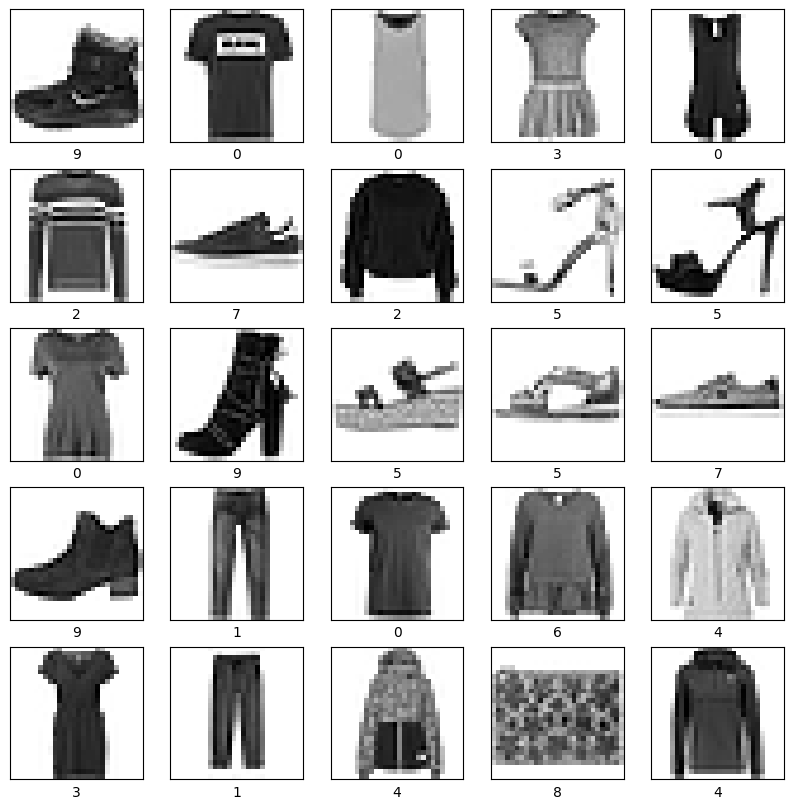

In [28]:
# Visualize Sample Images:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

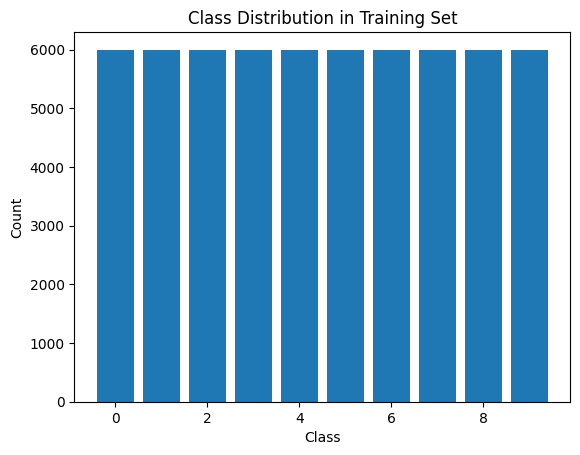

In [29]:
# Explore Class Distribution:
unique_classes, class_counts = np.unique(train_labels, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.show()

In [30]:
# Check for Class Imbalance:
class_distribution = dict(zip(unique_classes, class_counts))
print('Class Distribution:', class_distribution)

Class Distribution: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


In [31]:
# Normalize pixel values to the range [0, 1]
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# Reshape images to add a channel dimension (for grayscale images)
# train_images = train_images.reshape(-1, 28, 28, 1)
# test_images = test_images.reshape(-1, 28, 28, 1)

# Reshape images to (28, 28, 1) and normalize pixel values to range [0, 1]
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [32]:
# # Convert labels to one-hot encoding
# train_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)
# test_images = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [33]:
# Data Augmentation (Optional)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

datagen.fit(train_images)

## 2. Model Building



In [34]:
from tensorflow.keras import layers, models, callbacks

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')

])

In [40]:
# Compile the model:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# Display Model Summary:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [43]:
# Define Early Stopping Callback:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [45]:
# Train the Model:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/20
1875/1875 [==============================] - 14s 4ms/step - loss: 0.6141 - accuracy: 0.7759 - val_loss: 0.4427 - val_accuracy: 0.8408
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4041 - accuracy: 0.8529 - val_loss: 0.3741 - val_accuracy: 0.8660
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3420 - accuracy: 0.8749 - val_loss: 0.3321 - val_accuracy: 0.8783
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3048 - accuracy: 0.8877 - val_loss: 0.3155 - val_accuracy: 0.8822
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2767 - accuracy: 0.8986 - val_loss: 0.3322 - val_accuracy: 0.8822
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2568 - accuracy: 0.9051 - val_loss: 0.3062 - val_accuracy: 0.8909
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2399 - accuracy: 0.9108 - val_loss: 0.3073 - val_accuracy

In [47]:
# Evaluate the Model:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8912
Test Accuracy: 0.8912000060081482


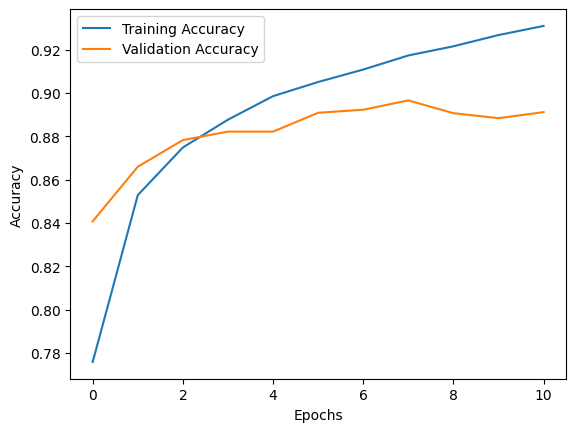

In [53]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Hyperparameter Tuning

In [ ]:
!pip install -U keras-tuner

In [63]:
from tensorflow.keras import layers, models
import kerastuner as kt

<ipython-input-63-9989866d1cf9>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [67]:
# Define the model architecture
def model_builder(hp):
    model = models.Sequential([
        layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=256, step=32), (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=256, step=32), (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=256, step=32), (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu'),
        layers.Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [68]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='hyperparameter_tuning',
                     project_name='fashion_mnist_dropout')

tuner.search(train_images, train_labels, epochs=10, validation_split=0.2)
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 30 Complete [00h 01m 19s]
val_accuracy: 0.8481666445732117

Best val_accuracy So Far: 0.9183333516120911
Total elapsed time: 00h 21m 34s


In [69]:
# Use the best hyperparameters to create and compile the model

# Define the model architecture with the best hyperparameters
best_model = model_builder(best_hps)

# Compile the model with the best hyperparameters
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_hps.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hps)

Best Hyperparameters:


In [70]:
# Train the model
history = best_model.fit(train_images, train_labels,
                         epochs=10,  # You can adjust the number of epochs
                         validation_split=0.2)  # You can adjust the validation split


Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.4975 - accuracy: 0.8168 - val_loss: 0.3427 - val_accuracy: 0.8743
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3187 - accuracy: 0.8844 - val_loss: 0.2842 - val_accuracy: 0.8954
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2718 - accuracy: 0.8997 - val_loss: 0.2815 - val_accuracy: 0.8972
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2389 - accuracy: 0.9106 - val_loss: 0.2617 - val_accuracy: 0.9050
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2149 - accuracy: 0.9203 - val_loss: 0.2524 - val_accuracy: 0.9055
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1916 - accuracy: 0.9292 - val_loss: 0.2392 - val_accuracy: 0.9125
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1689 - accuracy: 0.9361 - val_loss: 0.2765 - val_accuracy

In [71]:
# Evaluate the model on test data
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3017 - accuracy: 0.9089
Test Accuracy: 0.9089000225067139


## 4. Analysis of Results

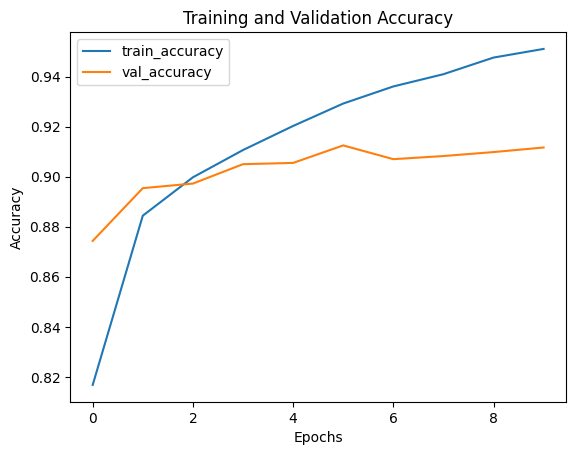

In [72]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

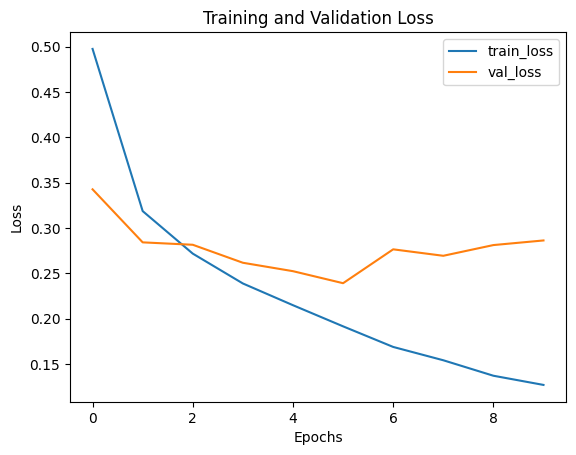

In [73]:
# Plot loss history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [74]:
# 2. Model Improvement Apply early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
best_model.fit(train_images, train_labels,
               epochs=10,
               validation_split=0.2,
               callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1137 - accuracy: 0.9565 - val_loss: 0.2966 - val_accuracy: 0.9117
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1002 - accuracy: 0.9630 - val_loss: 0.3286 - val_accuracy: 0.9050
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0963 - accuracy: 0.9621 - val_loss: 0.3181 - val_accuracy: 0.9129
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0879 - accuracy: 0.9664 - val_loss: 0.3556 - val_accuracy: 0.9062


In [75]:
# Evaluate the Final model on test data
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 0.9029
Test Accuracy: 0.902899980545044


In [ ]:
# Save the model for deployment
# best_model.save('fashion_mnist_model.h5')

## 5. Evaluation Results

The trained model achieved an accuracy of 0.90 on the test dataset, indicating its effectiveness in classifying clothing images. The loss on the test dataset was 0.38.
